In [18]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score
import pandas as pd

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, LabelBinarizer
import glob
files = glob.glob('/content/drive/MyDrive/NM/Crop_recommendation.csv')

In [20]:
data = pd.read_csv('/content/drive/MyDrive/NM/Crop_recommendation.csv')

In [21]:
print(data.head(10))
print(data['label'])
print(data.info())
print(data.describe())

    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice
5  69  37  42    23.058049  83.370118  7.073454  251.055000  rice
6  69  55  38    22.708838  82.639414  5.700806  271.324860  rice
7  94  53  40    20.277744  82.894086  5.718627  241.974195  rice
8  89  54  38    24.515881  83.535216  6.685346  230.446236  rice
9  68  58  38    23.223974  83.033227  6.336254  221.209196  rice
0         rice
1         rice
2         rice
3         rice
4         rice
         ...  
2195    coffee
2196    coffee
2197    coffee
2198    coffee
2199    coffee
Name: label, Length: 2200, dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to

In [22]:
data.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [23]:
data.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

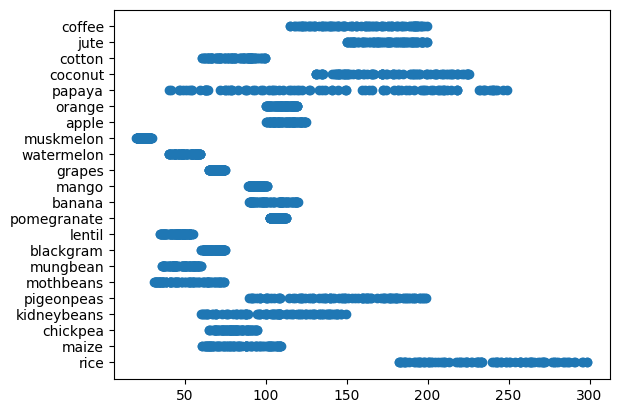

In [24]:
plt.scatter(y="label", x="rainfall", data=data);

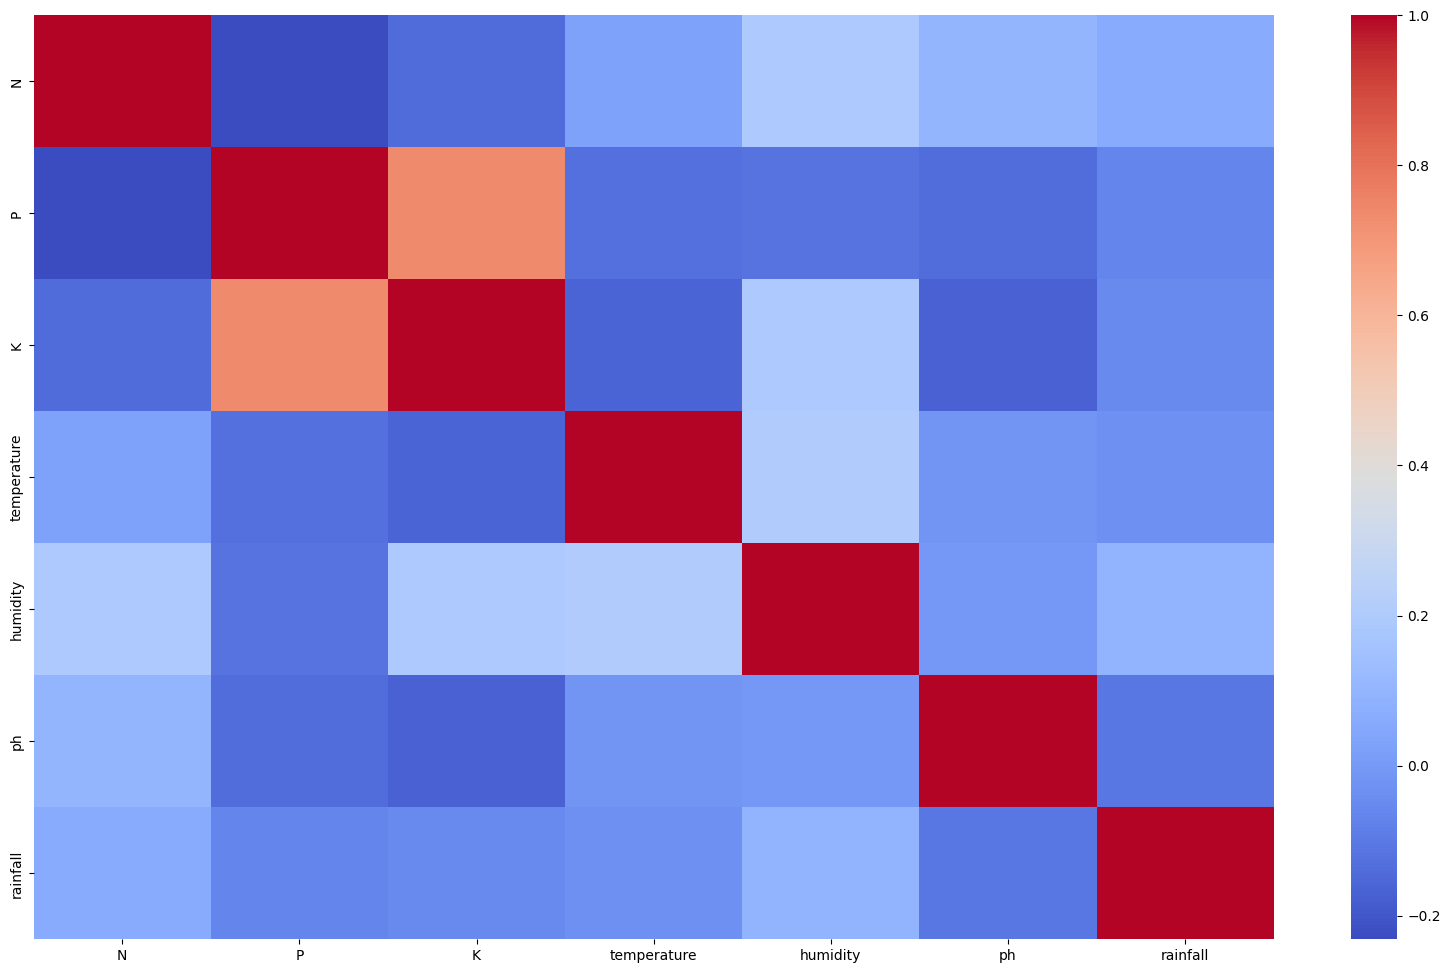

In [25]:
correlation_matrix = data.corr(numeric_only=True)
plt.figure(figsize=(20,12))
sns.heatmap(correlation_matrix, cmap="coolwarm");

In [26]:
inp = data[['N', 'P', 'K', 'temperature','humidity','ph','rainfall']]
labelData = data['label']
print(labelData)

0         rice
1         rice
2         rice
3         rice
4         rice
         ...  
2195    coffee
2196    coffee
2197    coffee
2198    coffee
2199    coffee
Name: label, Length: 2200, dtype: object


In [27]:
label_encoder = LabelBinarizer()
label_encoder.fit(labelData)
encoded=label_encoder.transform(labelData)
y = pd.DataFrame(encoded)


In [28]:
scalar= StandardScaler()
scale=scalar.fit(inp)
X=scale.transform(inp)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [30]:
model1 = RandomForestClassifier(n_estimators=100, random_state=42)
model1.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [31]:
model2 = xgb.XGBClassifier()
model2.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [32]:
y_pred1 = model1.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

NameError: name 'y_pred' is not defined

In [ ]:
y_pred2 = model2.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

In [ ]:
predicted_values = label_encoder.inverse_transform(y_pred1)
prediction=pd.DataFrame(predicted_values)
prediction.head()

In [ ]:
predicted_values = label_encoder.inverse_transform(y_pred2)
prediction=pd.DataFrame(predicted_values)
prediction.head()